# Figure 1. The oviINs high level of inputs and outputs visualized
- Import all cell-type connectivity in the hemibrain
- Isolate inputs and outputs to the cell-types
- Plot these and label the oviINs

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neuprint import Client, fetch_neurons, NeuronCriteria as NC


auth_token_file = open("/Users/rhessa/flybrain-clustering/flybrain.auth.txt", 'r')
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:v1.2.1', token=auth_token)
except:
    np_client = None

In [30]:
# Import all cell type data from neuprint
all_ns = NC(status='Traced')
cell_types = fetch_neurons(all_ns)
cell_types

(           bodyId         instance    type   pre  post  downstream  upstream  \
 0       198469830             None    None     0     0           0         0   
 1       198810827             None    None     0     0           0         0   
 2       198815212             None    None     0     0           0         0   
 3       199147536             None    None     0     0           0         0   
 4       199156210             None    None     0     0           0         0   
 ...           ...              ...     ...   ...   ...         ...       ...   
 97895  7112622044  LAL137(PVL05)_L  LAL137  1376  2087       11635      2087   
 97896  7112622236             None    None     5    79          22        79   
 97897  7112623021             None    None   104   503         445       503   
 97898  7112623023             None    None    28    17         205        17   
 97899  7112623383             None    None     5    34          42        34   
 
        mito        size  

In [31]:
# Edit dataframe for easier usage
types = cell_types[0][['instance', 'pre', 'post']].copy()
types

,instance,pre,post
0,None,0,0
1,None,0,0
2,None,0,0
3,None,0,0
4,None,0,0
...,...,...,...
97895,LAL137(PVL05)_L,1376,2087
97896,None,5,79
97897,None,104,503
97898,None,28,17


In [32]:
# Collapse all cell type instances and sum the pre and post counts
types = types.groupby('instance').sum()
types

,pre,post
instance,,
(ADL08)_L,1463,1179
(ADM01)_L,5905,12844
(ADM03)_L,1596,9608
(ADM03)_R,173,263
(ADM04)_L,2208,7083
...,...,...
vLN27_R,452,1229
vLN28_R,232,1244
vLN29_R,232,1242


In [33]:
# Add a color column where oviIN is red, and the rest are blue
types['color'] = 'blue'
types.loc['oviIN_R', 'color'] = 'red'
types.loc['oviIN_L', 'color'] = 'red'
types

,pre,post,color
instance,,,
(ADL08)_L,1463,1179,blue
(ADM01)_L,5905,12844,blue
(ADM03)_L,1596,9608,blue
(ADM03)_R,173,263,blue
(ADM04)_L,2208,7083,blue
...,...,...,...
vLN27_R,452,1229,blue
vLN28_R,232,1244,blue
vLN29_R,232,1242,blue


Text(0.5, 0.95, 'N=7794')

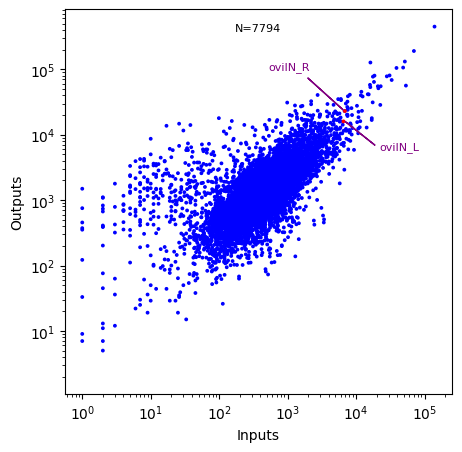

In [102]:
# Plot the data
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(types['pre'], types['post'], marker='o', c=types['color'], s=3)
ax.set_xlabel('Inputs')
ax.set_ylabel('Outputs')
ax.set_xscale('log')
ax.set_yscale('log')

# Add in arrows to the two oviINs
ax.annotate('oviIN_R', (types.loc['oviIN_R', 'pre'], types.loc['oviIN_R', 'post']), textcoords="offset points", xytext=(-40,30), ha='center', fontsize=8, color='purple')
ax.annotate('oviIN_L', (types.loc['oviIN_L', 'pre'], types.loc['oviIN_L', 'post']), textcoords="offset points", xytext=(40,-20), ha='center', fontsize=8, color='purple')

# Add in an arrow from the label to the point
ax.arrow(types.loc['oviIN_R', 'pre']-400, types.loc['oviIN_R', 'post']+1000, -4500, 50000, color='purple')
ax.arrow(types.loc['oviIN_L', 'pre']+400, types.loc['oviIN_L', 'post']-100, 12000, -9000, color='purple')

# Add in label for number of data points
ax.text(0.5, 0.95, f'N={len(types)}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=8)